# BeautifulSoup

In [ ]:
# 코랩에서는 requests와 bs4가 기본 설치 되어 있음
# !pip install requests
# !pip install beautifulsoup4

In [1]:
#코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
from bs4 import BeautifulSoup

# Selenium

## Selenium 설치

In [2]:
!pip install selenium
!apt-get update

# (최초 1회)
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver '/content/drive/MyDrive/Colab Notebooks' #
!pip install chromedriver-autoinstaller

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 29.6 MB/s eta 0:00:00
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,168 kB]
Get:1

In [3]:
!python --version

import selenium
print(selenium.__version__)

Python 3.11.13
4.34.2


In [4]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sys
from selenium.webdriver.common.keys import Keys
import urllib.request
import os
from urllib.request import urlretrieve

import time
import pandas as pd
import chromedriver_autoinstaller  # setup chrome options

In [5]:
# 크롬 드라이버 저장된 경로 변수로 지정
chrome_path = "/content/drive/MyDrive/Colab Notebooks/chromedriver"

sys.path.insert(0,chrome_path)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 화면 없이 백그라운드에서 실행 -> Colab 필수
chrome_options.add_argument('--no-sandbox') #
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('lang=ko_KR') # 브라우저 언어 설정 한국어
chrome_options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36') # 실제 사람 브라우저 요청

chromedriver_autoinstaller.install()  # set the target URL

## 유튜브 크롤링

### 댓글 가져오기

In [6]:
driver = webdriver.Chrome(options=chrome_options)

In [7]:
urls = [
    #"https://www.youtube.com/watch?v=trvBLQvW1t8",
    #"https://www.youtube.com/watch?v=KP2SNQGKtws",
    #"https://www.youtube.com/watch?v=Y53dxAMqRsA",
    #"https://www.youtube.com/watch?v=ESg9AKi_VIQ&t=600s",
    #"https://www.youtube.com/watch?v=f1ZHX3sEH6Y",
    #"https://www.youtube.com/watch?v=ZUoSfstPB4w",
    #"https://www.youtube.com/watch?v=ldwCFcZxXrk",
    #"https://www.youtube.com/watch?v=rdC6HYUWu1Y",
    #"https://www.youtube.com/watch?v=HhPpbuz2Co4",
    #"https://www.youtube.com/watch?v=SlBiAERuJHY",
    #"https://www.youtube.com/watch?v=hZSwWqpMcqQ",
    #"https://www.youtube.com/watch?v=ceuRw4xOERQ",
    #"https://www.youtube.com/watch?v=4vJNYWXW2V8",
    #"https://www.youtube.com/watch?v=QT3eApAsT08&t=537s",
    #"https://www.youtube.com/watch?v=AFecNNv0YQI",
    #9.13
    "https://www.youtube.com/watch?v=woW2tE2PHDk",
    "https://www.youtube.com/watch?v=CYrHmidouao",
    "https://www.youtube.com/watch?v=j-9elxfKWoY",
    "https://www.youtube.com/watch?v=WLVUo_QVwXQ",
    "https://www.youtube.com/watch?v=Kqy6xeRtJhM",
    "https://www.youtube.com/watch?v=9uFjhv4v4Lc",
    "https://www.youtube.com/watch?v=ah1J1Mypeds",
    "https://www.youtube.com/watch?v=WiASXwodyMA",
    "https://www.youtube.com/watch?v=z8iG9ody_j4",
    "https://www.youtube.com/watch?v=DfALBoB0OyE",
    "https://www.youtube.com/watch?v=9n1gPseTxoE",
    "https://www.youtube.com/watch?v=aWCHZGWJMwM",
    "https://www.youtube.com/watch?v=mkRiG7rjjVY",
    "https://www.youtube.com/watch?v=j-9elxfKWoY&t=28s",

    #6.17
    #"https://www.youtube.com/watch?v=GdnxZQFdwwc",
    #"https://www.youtube.com/watch?v=tUOJw9mLZvE&t=4s",
    #"https://www.youtube.com/watch?v=RuPki6-4lrk",
    #"https://www.youtube.com/watch?v=EFgm8AGtT64",
    #"https://www.youtube.com/watch?v=Y_qgA6mVgrY",
    #"https://www.youtube.com/watch?v=vHnTS6k9_ac",
    #"https://www.youtube.com/watch?v=fvcYhx8ODs8",
    #"https://www.youtube.com/watch?v=00mSybji_pM",
    #"https://www.youtube.com/watch?v=BdEeITpZEDs",
    #"https://www.youtube.com/watch?v=xGG7VjrTLmo",
    #"https://www.youtube.com/watch?v=Pk6gEJkWV3Y",
    #"https://www.youtube.com/watch?v=7omtZF7nopg",
    #"https://www.youtube.com/watch?v=HNJXd7fAeUc",
    #"https://www.youtube.com/watch?v=Gj4JJ8Mu7MU",
    #"https://www.youtube.com/watch?v=_ZG2W1qhVlc",
    #"https://www.youtube.com/watch?v=wI8eDlrNcEk",


]
all_comments_data = []  # 모든 영상 댓글을 저장할 리스트

for url in urls:
    print(f"▶ 크롤링 중: {url}")
    driver.get(url)
    driver.implicitly_wait(10)
    driver.maximize_window()
    time.sleep(4)

    # ✅ 영상 제목 추출
    try:
        title_elem = driver.find_element(By.XPATH, '//*[@id="title"]/h1/yt-formatted-string')
        video_title = title_elem.text
    except:
        video_title = "제목 없음"

    # 스크롤 내려서 댓글 로딩
    for _ in range(10):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(2)

    # 댓글 블록 추출
    comment_blocks = driver.find_elements(By.XPATH, '//*[@id="contents"]/ytd-comment-thread-renderer')

    for block in comment_blocks:
        try:
            comment = block.find_element(By.XPATH, './/*[@id="content-text"]').text
        except:
            comment = ""
        try:
            author = block.find_element(By.XPATH, './/a[@id="author-text"]').text
        except:
            author = ""
        try:
            time_posted = block.find_element(By.XPATH, './/*[@id="published-time-text"]/a').text
        except:
            time_posted = ""
        try:
            likes = block.find_element(By.XPATH, './/span[@id="vote-count-middle"]').text.strip()
        except:
            likes = "0"

        all_comments_data.append({
            '영상제목': video_title,   # ✅ URL 대신 제목 사용
            '작성자': author,
            '시간': time_posted,
            '댓글': comment,
            '좋아요': likes
        })

# DataFrame으로 변환
df = pd.DataFrame(all_comments_data)

print("총 댓글 수:", len(df))
print(df.head())

# CSV로 저장
df.to_excel("youtube_comments_9.13.xlsx", index=False, engine="openpyxl")
print("✅ 엑셀 저장 완료: youtube_comments.xlsx")

▶ 크롤링 중: https://www.youtube.com/watch?v=woW2tE2PHDk
▶ 크롤링 중: https://www.youtube.com/watch?v=CYrHmidouao
▶ 크롤링 중: https://www.youtube.com/watch?v=j-9elxfKWoY
▶ 크롤링 중: https://www.youtube.com/watch?v=WLVUo_QVwXQ
▶ 크롤링 중: https://www.youtube.com/watch?v=Kqy6xeRtJhM
▶ 크롤링 중: https://www.youtube.com/watch?v=9uFjhv4v4Lc
▶ 크롤링 중: https://www.youtube.com/watch?v=ah1J1Mypeds
▶ 크롤링 중: https://www.youtube.com/watch?v=WiASXwodyMA
▶ 크롤링 중: https://www.youtube.com/watch?v=z8iG9ody_j4
▶ 크롤링 중: https://www.youtube.com/watch?v=DfALBoB0OyE
▶ 크롤링 중: https://www.youtube.com/watch?v=9n1gPseTxoE
▶ 크롤링 중: https://www.youtube.com/watch?v=aWCHZGWJMwM
▶ 크롤링 중: https://www.youtube.com/watch?v=mkRiG7rjjVY
▶ 크롤링 중: https://www.youtube.com/watch?v=j-9elxfKWoY&t=28s
총 댓글 수: 537
                              영상제목           작성자           시간  \
0  9.13 부동산 대책 발표...핵심 키워드는? / YTN      @김경리-q5r  6 years ago   
1  9.13 부동산 대책 발표...핵심 키워드는? / YTN    @terry7610  6 years ago   
2  9.13 부동산 대책 발표...핵심 키워드는? / YTN      @문종원-

In [ ]:
url = "https://www.youtube.com/watch?v=trvBLQvW1t8" # 크롤링할 링크
driver.get(url) # 웹 브라우저를 자동으로 열고 접속
driver.implicitly_wait(10) # 웹페이지의 요소들이 로딩될 때까지 최대 10초간 기다림
driver.maximize_window() #브라우저 창을 최대화해서 모든 요소가 잘 보이도록
time.sleep(4) #단순히 4초 동안 기다림 -> 유튜브는 처음 페이지 열고 댓글 나타날 때까지 시간이 좀 걸림
driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") # JS 로 웹페이지를 맨 아래까지 스크롤

for i in range(0, 10): # 스크롤 10번 반복
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(2)

# 댓글 텍스트를 모두 가져오기 # 직접 찾아보자! copy xpath -> //* 는 '모든 태그 중에서'
comment_elems = driver.find_elements('xpath', '//*[@id="content-text"]') # //yt-attributed-string[@id="content-text"]

# 각 댓글에서 텍스트만 꺼내기
comments = [elem.text for elem in comment_elems]

# 출력해보기
for i, comment in enumerate(comments[:10]):
    print(f"{i+1}. {comment}")


1. 자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)
2. 외국인 수요도 제한을 해줬으면 합니다
3. 미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은 퇴직연금 건들지 마시고요.
4. 인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아파트 콘크리트 덩어리에 근로소득으로 평생 벌어도 못벌돈 대출해서 불나방 처럼 뛰어드는게 이상한거 아니냐고...
5. 제발 실물경제, 미래산업 등
가치 있는곳에 돈이 흐르면 좋겠다
6. 이미 대출받은 영끌들이 혜택받은게 아니다
걔들은 더 대출받아서 돈 들고 내 물건 받아 줄 사람이 필요한데 다리가 끊겼음
사다리가 끊긴게 아니라 걔들은 돌아갈 다리가 없고, 
이제부터 원리금 상환 홧팅하쇼!!!
7. 대한민국 다 거지임 대출빼면 아무것도 없는 집이 대다수임
8. 버블만 키우면서 자 다음 세대야 더 오른다~ 빨리 폭탄 받아라! 이러고 있던건데 누군가는 끊긴해야했음
9. 전세사기 규제 강화좀...
10. 주식은 미수하지말라고 난리치더니 
왜 아파트는 미수하라고 떠밀어
능력도 안되는데 대출부터 하는게 맞냐


In [ ]:
len(comments)

110

### 각 댓글의 작성자, 좋아요, 날짜 같이 가져오기

In [ ]:
# 먼저 블록 리스트 가져오기, 가장 큰거
comment_blocks = driver.find_elements(By.XPATH, '//*[@id="contents"]/ytd-comment-thread-renderer')
comments_data = []

# 각 블록에 대해 '상대 경로(.)'로 for 문 내용을 완성한다 -> 댓글끼리 매칭될 수 있도록!
# 예외처리를 통해 어떤 요소가 없는 경우 에러를 방지
for block in comment_blocks:
    # 댓글
    try:
        comment = block.find_element(By.XPATH, './/*[@id="content-text"]').text
    except:
        comment = ""

    # 작성자
    try: # //*로 해도 되지만 //a가 좀 더 효율적
        author = block.find_element(By.XPATH, './/a[@id="author-text"]').text
    except:
        author = ""

    # 시간
    try:
        time_posted = block.find_element(By.XPATH, './/*[@id="published-time-text"]/a').text
    except:
        time_posted = ""

    # 좋아요 수
    try: # //*로 해도 되지만 //span이 더 효율적
        vote_span = block.find_element(By.XPATH, './/span[@id="vote-count-middle"]')
        likes = vote_span.text.strip()
    except:
        likes = "0"

    comments_data.append({
        '작성자': author,
        '시간': time_posted,
        '댓글': comment,
        '좋아요': likes
    })

# 결과 일부 출력
for c in comments_data[:5]:
    print(c)


{'작성자': '@이동석-u3z', '시간': '4 weeks ago', '댓글': '자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)', '좋아요': '2.7K'}
{'작성자': '@freshgarden4407', '시간': '4 weeks ago', '댓글': '외국인 수요도 제한을 해줬으면 합니다', '좋아요': '1.2K'}
{'작성자': '@casteria35', '시간': '4 weeks ago', '댓글': '미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은 퇴직연금 건들지 마시고요.', '좋아요': '756'}
{'작성자': '@꿈꾸는쥐-o8z', '시간': '4 weeks ago', '댓글': '인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아파트 콘크리트 덩어리에 근로소득으로 평생 벌어도 못벌돈 대출해서 불나방 처럼 뛰어드는게 이상한거 아니냐고...', '좋아요': '250'}
{'작성자': '@Hsomm-dbaa', '시간': '4 weeks ago', '댓글': '제발 실물경제, 미래산업 등\n가치 있는곳에 돈이 흐르면 좋겠다', '좋아요': '1.3K'}


In [ ]:
import pandas as pd
df = pd.DataFrame(comments_data)
df

,작성자,시간,댓글,좋아요
0,@이동석-u3z,4 weeks ago,"자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K
1,@freshgarden4407,4 weeks ago,외국인 수요도 제한을 해줬으면 합니다,1.2K
2,@casteria35,4 weeks ago,미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은...,756
3,@꿈꾸는쥐-o8z,4 weeks ago,인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아...,250
4,@Hsomm-dbaa,4 weeks ago,"제발 실물경제, 미래산업 등\n가치 있는곳에 돈이 흐르면 좋겠다",1.3K
...,...,...,...,...
115,@hobit-j4o,4 weeks ago,사다리 걷어차기가 아니고 엊그제 집 산 사람들 고점에 물린거 같은데..?,5
116,@shg4453,4 weeks ago,경제가 좋아질거같아 빛 더 낼수있을거 같은데 '바닷물' 더 드시오~ > [화들짝],
117,@윤병훈-r4c,4 weeks ago,사다리 걷어차는게 아니라 거품 걷어내기 같은데,1
118,@Ha2yo_01,4 weeks ago,하.. 진짜 나라 미래가 심히 걱정되네,3


# bs4 + Selenium

### 링크 가져오기

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

태그: div(구역을 나눔), a ...

class는 태그에 붙이는 이름표 -> 공백 = & -> OO XX -> OO, XX라는 두개의 클래스

예시

<a href="https://n.news.naver.com/article/468/0000115996"
   class="sa_thumb_link NLOG_IMPRESSION"
   data-clk="..." data-gdid="..." ...>

CSS Selector에서는
- .sa_thumb_link: sa_thumb_link 클래스 선택
- a.sa_thumb_link: a 태그 중에서 sa_thumb_link 를 있기만 하면 가져옴
- a.sa_thumb_link.NLOG_IMPRESSION: 두 클래스 다 있는 a 태그만 선택

In [ ]:
def get_article_links(base_url, click_count=3): ## 더보기 클릭수
    # 크롬 옵션 설정
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')

    # 드라이버 실행
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(base_url)

    wait = WebDriverWait(driver, 10)

    for _ in range(click_count):
        try:
            # 스크롤 맨 아래로 내림
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

            # "기사 더보기" 버튼 클릭
            more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'a.section_more_inner._CONTENT_LIST_LOAD_MORE_BUTTON')))
            more_button.click()
            time.sleep(2)

        except Exception as e: # 버튼이 없을 경우 예외 처리
            print("더보기 클릭 실패:", e)
            break # 예외 발생 시 종료

    # 모든 기사 컨테이너 수집
    # div 태그 + class 밝혀주기
    items = driver.find_elements(By.CSS_SELECTOR, 'div.sa_item_flex')

    links = set()
    for item in items:
        try:
            # 각 기사에서 a 태그의 href 추출
            link_tag = item.find_element(By.CSS_SELECTOR, 'a.sa_thumb_link')
            url = link_tag.get_attribute("href") # href라는 속성을 가진 애
            links.add(url)
        except:
            continue

    driver.quit()
    return list(links)

In [ ]:
news_links = get_article_links("https://news.naver.com/breakingnews/section/105/226", click_count=3)
for link in news_links:
    print(link)

https://n.news.naver.com/mnews/article/029/0002966732
https://n.news.naver.com/mnews/article/003/0013349233
https://n.news.naver.com/mnews/article/003/0013346509
https://n.news.naver.com/mnews/article/018/0006059063
https://n.news.naver.com/mnews/article/029/0002966804
https://n.news.naver.com/mnews/article/018/0006059220
https://n.news.naver.com/mnews/article/003/0013346493
https://n.news.naver.com/mnews/article/138/0002200160
https://n.news.naver.com/mnews/article/018/0006059996
https://n.news.naver.com/mnews/article/003/0013348897
https://n.news.naver.com/mnews/article/003/0013346953
https://n.news.naver.com/mnews/article/014/0005373163
https://n.news.naver.com/mnews/article/009/0005521382
https://n.news.naver.com/mnews/article/031/0000946783
https://n.news.naver.com/mnews/article/018/0006059757
https://n.news.naver.com/mnews/article/001/0015493349
https://n.news.naver.com/mnews/article/011/0004506282
https://n.news.naver.com/mnews/article/003/0013348050
https://n.news.naver.com/mne

### 본문 크롤링

위의 bs4에서 만든 코드 가져오기

In [ ]:
def crawl_naver_news(url):
    headers = {
        'User-Agent': 'Mozilla/5.0'
    }

    try:
        response = requests.get(url, headers=headers)
        response.encoding = 'utf-8'
        soup = BeautifulSoup(response.text, 'html.parser')

        # 헤드라인
        headline_tag = soup.select_one('h2.media_end_head_headline span')
        headline = headline_tag.get_text(strip=True) if headline_tag else 'N/A'

        # 작성 시간
        datetime_tag = soup.select_one('span.media_end_head_info_datestamp_time')
        datetime = datetime_tag.get_text(strip=True) if datetime_tag else 'N/A'

        # 본문 내용
        article_tag = soup.select_one('article#dic_area')
        paragraphs = article_tag.stripped_strings if article_tag else []
        content = '\n'.join(paragraphs)

        return {
            'headline': headline,
            'datetime': datetime,
            'content': content
        }

    except Exception as e:
        print(f"[에러 발생] {e}")
        return {
            'headline': 'ERROR',
            'datetime': 'ERROR',
            'content': 'ERROR'
        }


In [ ]:
import pandas as pd

# 크롤링 결과 저장 리스트 초기화
data = []

# 각 링크에 대해 기사 정보 수집
for url in news_links:
    result = crawl_naver_news(url)
    data.append(result)

# DataFrame으로 변환
df = pd.DataFrame(data)
df

,headline,datetime,content
0,"인플루언서 이엘리, 캠톡 공식 캠톡커 합류… 62만 팔로워와 함께 상생 플랫폼 행보...",2025.07.08. 오전 9:58,영상통화 기반 소셜 플랫폼 캠톡(Camtalk)이 글로벌 인플루언서 이엘리를 공식 ...
1,"컴투스홀딩스 '소울 스트라이크', 또래오래와 제휴 이벤트",2025.07.08. 오전 10:48,룰렛 이벤트로 인게임 아이템 및 치킨 할인 '앱 포인트' 지급\n[서울=뉴시스] 오...
2,"틱톡, 크리에이터 행사서 콘텐츠 제작 팁·수익화 전략 공유",2025.07.07. 오전 9:15,국립정신건강센터와 함께 정신건강 안전 논의\n크리에이터 350명 참석·실질적 성장 ...
3,3천명 전직원에게 월 8만원 유료 챗GPT 제공한 토스,2025.07.07. 오전 8:21,월 60달러 유료 버전 계열사 직원까지 제공시 월 2.45억\nAI 에이전트 기반 ...
4,"카카오, 톡딜·선물하기·카쇼라 여름 시즌 프로모션 진행",2025.07.08. 오전 11:49,"카카오 제공\n카카오가 ‘톡딜’, ‘카카오톡 선물하기’, ‘카카오쇼핑라이브(카쇼라)..."
...,...,...,...
137,"KAIST 최문정 교수, 유엔 AI 국제회의 자문위원 선임...한국인 유일",2025.07.08. 오전 8:46,유엔 ‘AI 포 굿 글로벌 서밋’ 자문위원 선임\nAI의 공공적 가치 제고 위한 국...
138,"네이버웹툰, 美 'LA 애니메 엑스포 2025' 성료",2025.07.07. 오전 8:54,북미 팬들과 소통 강화\n웹툰 IP 글로벌 무대서 주목\n'신의 탑' SIU 작가 ...
139,트럼프 대통령 관세 서한 발송에 비트코인 가격 하락,2025.07.08. 오전 8:08,"10만 8019달러 기록, 전일보다 1.17%↓\n장기 전망은 긍정적, 상승 신호 ..."
140,"""韓 판매자 수수료 4%""...알리바바닷컴, 중소기업 수출 더 세게 돕는다",2025.07.07. 오후 3:02,거래 보호 서비스 출시…부산 사무소 개설 및 현지화 위한 투자 늘려\n“알리바바닷컴...


유튜브 댓글 시각화

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DSL-2/edadata/youtube_comments.xlsx'
df = pd.read_excel(file_path)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영상제목    1911 non-null   object
 1   작성자     1905 non-null   object
 2   시간      1911 non-null   object
 3   댓글      1908 non-null   object
 4   좋아요     1657 non-null   object
dtypes: object(5)
memory usage: 74.8+ KB
None


,영상제목,작성자,시간,댓글,좋아요
0,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@이동석-u3z,4 weeks ago,"자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K
1,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@freshgarden4407,4 weeks ago,외국인 수요도 제한을 해줬으면 합니다,1.2K
2,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@casteria35,4 weeks ago,미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은...,756
3,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@꿈꾸는쥐-o8z,4 weeks ago,인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아...,250
4,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@Hsomm-dbaa,4 weeks ago,"제발 실물경제, 미래산업 등\n가치 있는곳에 돈이 흐르면 좋겠다",1.3K


In [ ]:
def parse_likes(x):
    if isinstance(x, str):
        x = x.strip().upper()
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif 'M' in x:
            return float(x.replace('M', '')) * 1000000
        elif x.isdigit():
            return int(x)
    return 0

df['좋아요(숫자)'] = df['좋아요'].apply(parse_likes).astype(int)
df.drop_duplicates(subset='댓글', inplace=True)
df.fillna('', inplace=True)

print("총 댓글 수:", len(df))
df.head()


총 댓글 수: 1895


,영상제목,작성자,시간,댓글,좋아요,좋아요(숫자)
0,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@이동석-u3z,4 weeks ago,"자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K,2700
1,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@freshgarden4407,4 weeks ago,외국인 수요도 제한을 해줬으면 합니다,1.2K,1200
2,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@casteria35,4 weeks ago,미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은...,756,756
3,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@꿈꾸는쥐-o8z,4 weeks ago,인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아...,250,250
4,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@Hsomm-dbaa,4 weeks ago,"제발 실물경제, 미래산업 등\n가치 있는곳에 돈이 흐르면 좋겠다",1.3K,1300


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47561 (\N{HANGUL SYLLABLE MAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

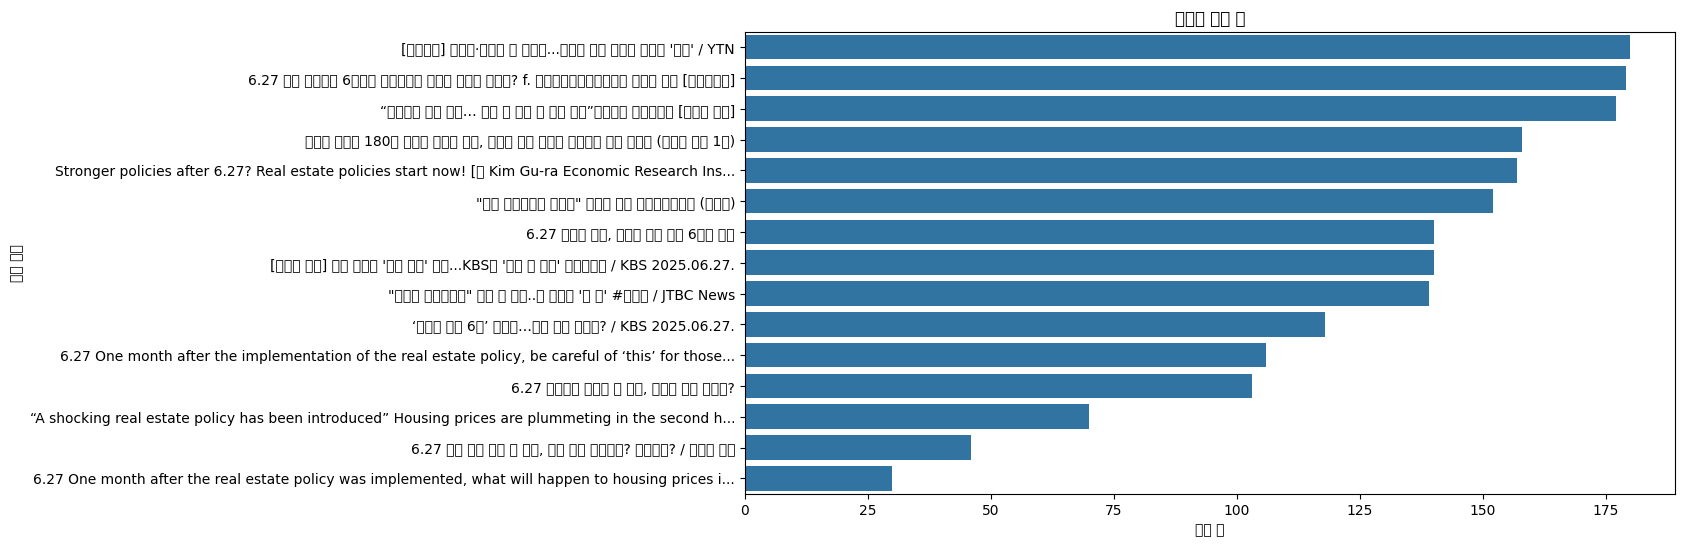

,영상제목,댓글,좋아요,좋아요(숫자)
833,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",언론끼고 있는 건설자 조사한번 들어가야 함,6.7K,6700
832,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",대출조였다고 2억이 내리면 이건 가짜 가격이고 가격올리는 세력이 있었다는 증거.,6.7K,6700
834,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",6억이상 대출자 10퍼도 안된다잖아.그말은 그 10퍼가 집값가지고 장난친다는거야.,6.3K,6300
868,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",송파쪽에는 거래 취소가 60% ㅋㅋㅋㅋㅋㅋ,3.1K,3100
852,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News","6억 대출 받는 사람은 서민이 아닙니다. 부자이거나, 투기꾼이라고 생각합니다.",3K,3000
836,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",언론이 투기세력들이다.,3K,3000
0,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제","자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K,2700
849,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",그 놈의 사다리 타령하는 언론은 대부분 건설사가 대주주지분 소유 더이상 가계부채로...,2.3K,2300
837,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",대출로 쌓아올린 집값. 대출 빛 갚느라 소비도 못하면서 아웅다웅. 언제가는 무너지게...,2.1K,2100
838,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",가격이 비싸서 대출해서 투기하는거보다 가격이 내려서 싸게 사는게 이득이지 진짜.,2K,2000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 영상별 댓글 수
plt.figure(figsize=(12,6))
sns.countplot(y='영상제목', data=df, order=df['영상제목'].value_counts().index)
plt.title("영상별 댓글 수")
plt.xlabel("댓글 수")
plt.ylabel("영상 제목")
plt.show()

# 좋아요 상위 댓글
top_likes = df.sort_values('좋아요(숫자)', ascending=False).head(10)
top_likes[['영상제목', '댓글', '좋아요', '좋아요(숫자)']]


In [ ]:
!pip install konlpy
!apt-get update
!apt-get install -y default-jdk
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 28.7 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,152 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get

In [ ]:
from konlpy.tag import Okt
okt = Okt()

def preprocess_text(text):
    return " ".join(okt.nouns(str(text)))

df['댓글_정제'] = df['댓글'].apply(preprocess_text)
df.head()


,영상제목,작성자,시간,댓글,좋아요,좋아요(숫자),댓글_정제
0,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@이동석-u3z,4 weeks ago,"자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K,2700,자금 층 청약 포기 실제 기사
1,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@freshgarden4407,4 weeks ago,외국인 수요도 제한을 해줬으면 합니다,1.2K,1200,외국인 수요 제한
2,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@casteria35,4 weeks ago,미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은...,756,756,미래세 위 정책 정말 국민연금 정책 다시 수정 퇴직 연금 건
3,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@꿈꾸는쥐-o8z,4 weeks ago,인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아...,250,250,인구 수직 낙하 경제 성장 률 사실 나라 믿음 하나로 아파트 콘크리트 덩어리 근로 ...
4,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@Hsomm-dbaa,4 weeks ago,"제발 실물경제, 미래산업 등\n가치 있는곳에 돈이 흐르면 좋겠다",1.3K,1300,제발 실물 경제 미래 산업 등 가치 곳 돈


In [ ]:
import json
# ======================================
# 5️⃣ 감성 사전 다운로드 및 로드
# ======================================
!wget -q -O SentiWord_info.json https://raw.githubusercontent.com/park1200656/KnuSentiLex/master/KnuSentiLex/data/SentiWord_info.json

with open("SentiWord_info.json", encoding="utf-8") as f:
    lex = json.load(f)

# 감성 사전 딕셔너리 생성
sentiment_dict = {item['word']: int(item['polarity']) for item in lex}
# 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# matplotlib에서 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

Selecting previously unselected package fonts-nanum.
(Reading database ... 126762 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45843 (\N{HANGUL SYLLABLE DAES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

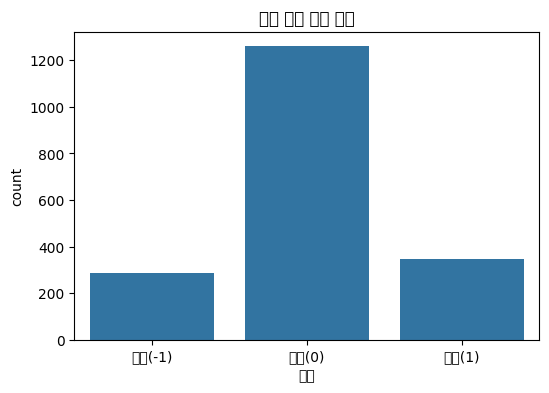

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45576 (\N{HANGUL SYLLABLE NUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

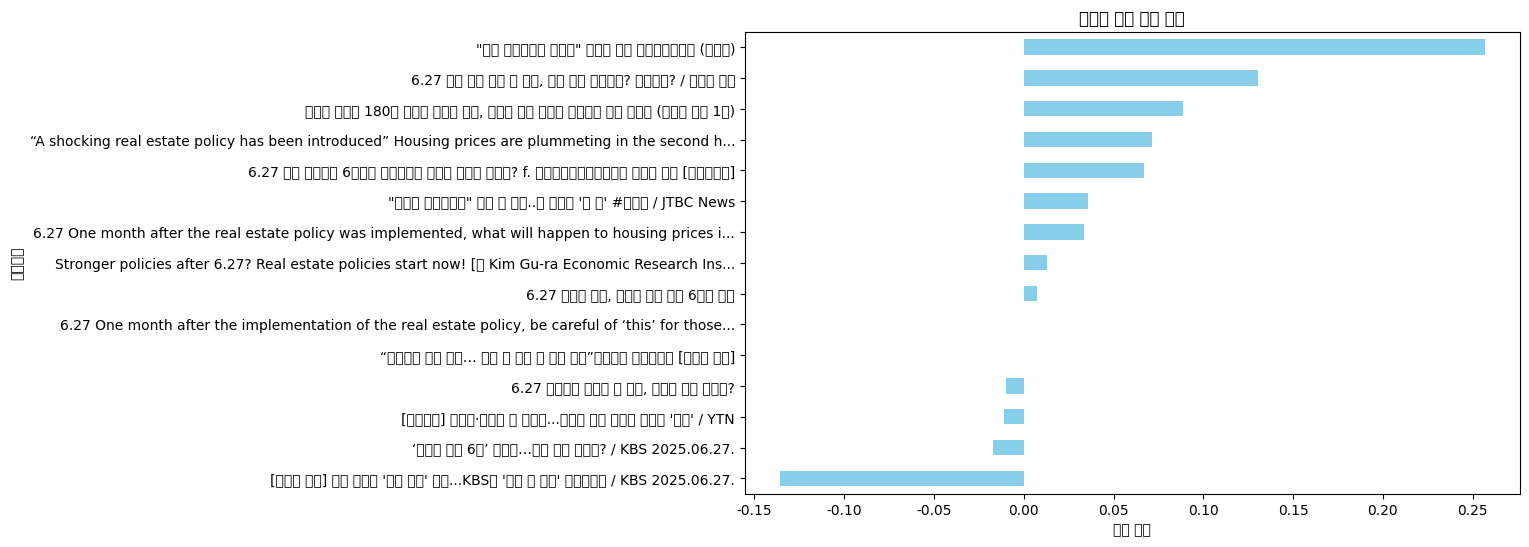

👍 좋아요 상위 10개 댓글


,영상제목,댓글,좋아요,좋아요(숫자),감성
833,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",언론끼고 있는 건설자 조사한번 들어가야 함,6.7K,6700,0
832,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",대출조였다고 2억이 내리면 이건 가짜 가격이고 가격올리는 세력이 있었다는 증거.,6.7K,6700,-1
834,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",6억이상 대출자 10퍼도 안된다잖아.그말은 그 10퍼가 집값가지고 장난친다는거야.,6.3K,6300,0
868,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",송파쪽에는 거래 취소가 60% ㅋㅋㅋㅋㅋㅋ,3.1K,3100,0
852,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News","6억 대출 받는 사람은 서민이 아닙니다. 부자이거나, 투기꾼이라고 생각합니다.",3K,3000,0
836,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",언론이 투기세력들이다.,3K,3000,0
0,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제","자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K,2700,-1
849,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",그 놈의 사다리 타령하는 언론은 대부분 건설사가 대주주지분 소유 더이상 가계부채로...,2.3K,2300,0
837,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",대출로 쌓아올린 집값. 대출 빛 갚느라 소비도 못하면서 아웅다웅. 언제가는 무너지게...,2.1K,2100,1
838,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",가격이 비싸서 대출해서 투기하는거보다 가격이 내려서 싸게 사는게 이득이지 진짜.,2K,2000,1


In [ ]:
# ======================================
# 6️⃣ 감성 점수 계산
# ======================================
def get_sentiment(text):
    score = 0
    for word in text.split():
        if word in sentiment_dict:
            score += sentiment_dict[word]
    if score > 0:
        return 1  # 긍정
    elif score < 0:
        return -1 # 부정
    else:
        return 0   # 중립

df['감성'] = df['댓글_정제'].apply(get_sentiment)
df['감성'].value_counts()

# ======================================
# 7️⃣ 시각화
# ======================================

# 전체 감성 분포
plt.figure(figsize=(6,4))
sns.countplot(x='감성', data=df)
plt.title("전체 댓글 감성 분포")
plt.xticks([0, 1, 2], ['부정(-1)', '중립(0)', '긍정(1)'])
plt.show()

# 영상별 평균 감성 점수
video_sentiment = df.groupby('영상제목')['감성'].mean()
plt.figure(figsize=(10,6))
video_sentiment.sort_values().plot(kind='barh', color='skyblue')
plt.title("영상별 평균 감성 점수")
plt.xlabel("평균 점수")
plt.show()

# 좋아요 상위 댓글
top_likes = df.sort_values('좋아요(숫자)', ascending=False).head(10)
print("👍 좋아요 상위 10개 댓글")
display(top_likes[['영상제목', '댓글', '좋아요', '좋아요(숫자)', '감성']])

In [ ]:
!pip install transformers torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# 사전 학습된 한국어 감성 분석 모델 (3개 라벨: 부정, 중립, 긍정)
MODEL_NAME = "nlp04/korean_sentiment_analysis_kcelectra"  # KoELECTRA 기반
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

sentiment_analyzer = pipeline("text-classification", model=model, tokenizer=tokenizer)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DSL-2/edadata/youtube_comments.xlsx'
df = pd.read_excel(file_path)
df.drop_duplicates(subset='댓글', inplace=True)
df.fillna('', inplace=True)

print("총 댓글 수:", len(df))
df.head()


총 댓글 수: 1895


,영상제목,작성자,시간,댓글,좋아요
0,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@이동석-u3z,4 weeks ago,"자금력 부족한 젊은층, 24억 부족해 청약포기 (실제 기사)",2.7K
1,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@freshgarden4407,4 weeks ago,외국인 수요도 제한을 해줬으면 합니다,1.2K
2,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@casteria35,4 weeks ago,미래세대를 위한 정책 정말 필요합니다. 국민연금정책도 다시 수정 해주세요. 그지같은...,756
3,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@꿈꾸는쥐-o8z,4 weeks ago,인구는 수직 낙하하고 경제 성장률도 사실상 없는 나라에서 오를거라는 믿음 하나로 아...,250
4,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",@Hsomm-dbaa,4 weeks ago,"제발 실물경제, 미래산업 등\n가치 있는곳에 돈이 흐르면 좋겠다",1.3K


In [ ]:
def analyze_sentiment(text):
    if len(text.strip()) == 0:
        return "중립"
    result = sentiment_analyzer(text[:512])[0]  # KoBERT 최대 입력 512 토큰
    return result['label']  # NEGATIVE / NEUTRAL / POSITIVE

# 댓글 감성 분석
df['KoBERT_감성'] = df['댓글'].apply(analyze_sentiment)
df['KoBERT_감성'].value_counts()


,count
KoBERT_감성,
짜증남,965
슬픔(우울한),316
고마운,222
일상적인,114
기쁨(행복한),104
즐거운(신나는),61
걱정스러운(불안한),49
생각이 많은,45
설레는(기대하는),16


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45843 (\N{HANGUL SYLLABLE DAES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

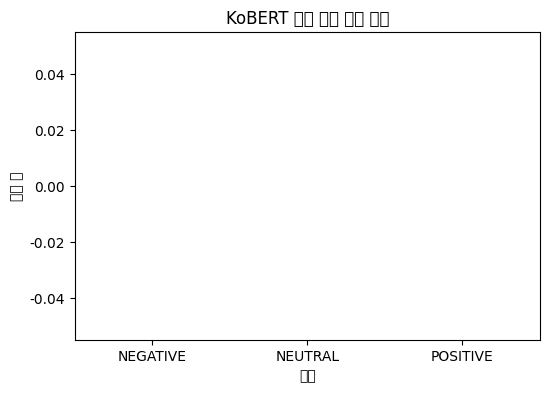

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44151 (\N{HANGUL SYLLABLE GEOD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

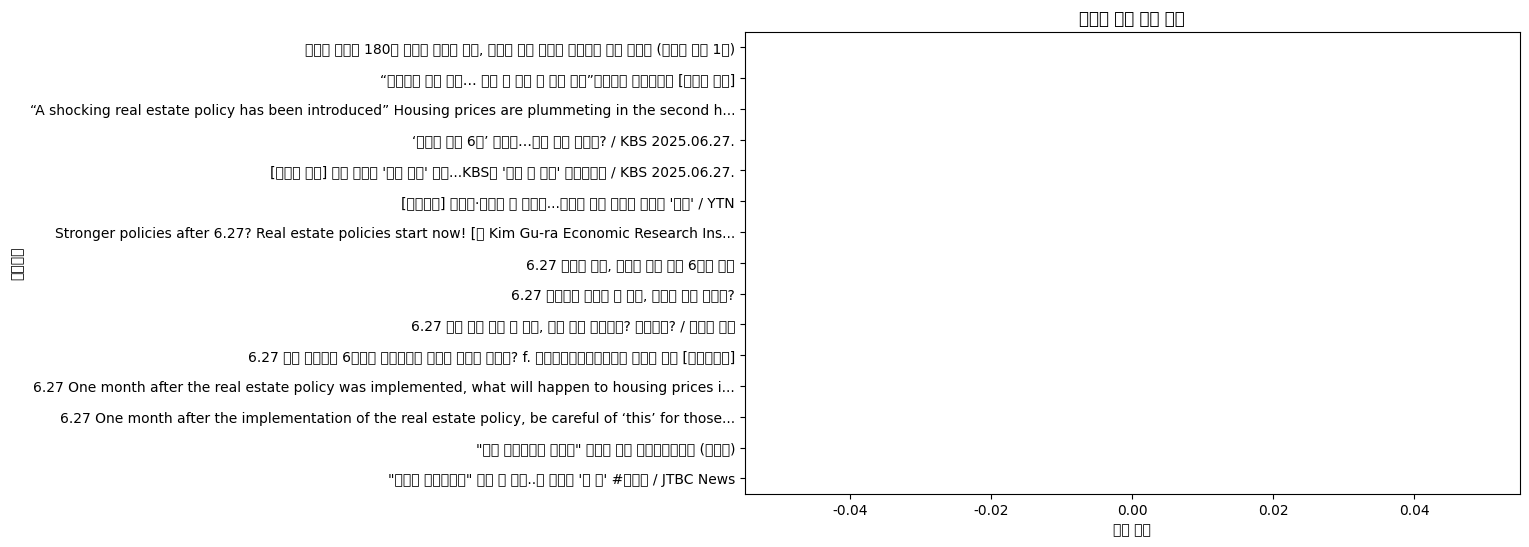

,영상제목,댓글,좋아요,KoBERT_감성
486,“초고강도 대출 규제… 이제 집 사면 안 되는 이유”｜박은정 감정평가사 [경제적 본능],대출을 끝까지 갚으려는게 아니라 오르면 팔면 되니까 그렇게 차익을 보려구 법인들이 ...,99,짜증남
1122,"초강력 규제에 180도 달라진 부동산 시장, 앞으로 더욱 강력한 정책들이 나올 겁니...",아파트 시대는 끝났다.아니 끝나야 한다,99,슬픔(우울한)
1140,"초강력 규제에 180도 달라진 부동산 시장, 앞으로 더욱 강력한 정책들이 나올 겁니...",잘한다 진짜 잘한다,97,기쁨(행복한)
36,"6.27 부동산 대책, 주담대 대출 한도 6억원 규제",대부분 댓글과 같이 아파트값을 진정으로 안정시키고 투기성 ‘폭탄 돌리기’를 차단하고...,97,슬픔(우울한)
935,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",땅덩어리 작은 나라에 외국인 매수 제한해야,95,짜증남
888,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",일 잘하네 은행들의 이자놀이 잡아야 집값이 잡힌다.,947,짜증남
496,“초고강도 대출 규제… 이제 집 사면 안 되는 이유”｜박은정 감정평가사 [경제적 본능],"사다리걷어차기,역차별정책?ㅋㅋㅋㅋㅋ이제안통한다 내란부동산쟁이들아",94,짜증남
211,"""이번 대출규제는 맛보기"" 부동산 대책 정리해드립니다 (너나위)",전세대출은 보증비율이 낮아지는 겁니다\n90에서 80으로 낮아지면 은행은 그만큼 신...,94,슬픔(우울한)
954,"""사다리 걷어차기냐"" 그럴 줄 알고..첫 대책에 '한 수' #뉴스다 / JTBC News",도대체 서민 누가 6억을 대출받아 집 사지?? 한달에 내야될 원금 이자가 얼마인데...,94,짜증남
1731,"6.27 대출규제 우회로 다 차단, 준비된 추가 조치는?","응원합니다 감사합니다 \n 이번에 부동산 공화국, 모든 국민이 피해자 되는 부동산...",94,짜증남


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='KoBERT_감성', data=df, order=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.title("KoBERT 기반 댓글 감성 분포")
plt.xlabel("감성")
plt.ylabel("댓글 수")
plt.show()

# 영상별 평균 긍정률
video_sentiment = df.groupby('영상제목')['KoBERT_감성'].apply(lambda x: (x == 'POSITIVE').mean())
plt.figure(figsize=(10,6))
video_sentiment.sort_values().plot(kind='barh', color='skyblue')
plt.title("영상별 긍정 댓글 비율")
plt.xlabel("긍정 비율")
plt.show()


# 좋아요 상위 댓글과 KoBERT 감성
top_likes = df.sort_values('좋아요', ascending=False).head(10)
top_likes[['영상제목', '댓글', '좋아요', 'KoBERT_감성']]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45843 (\N{HANGUL SYLLABLE DAES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52293 (\N{HANGUL SYLLABLE CAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

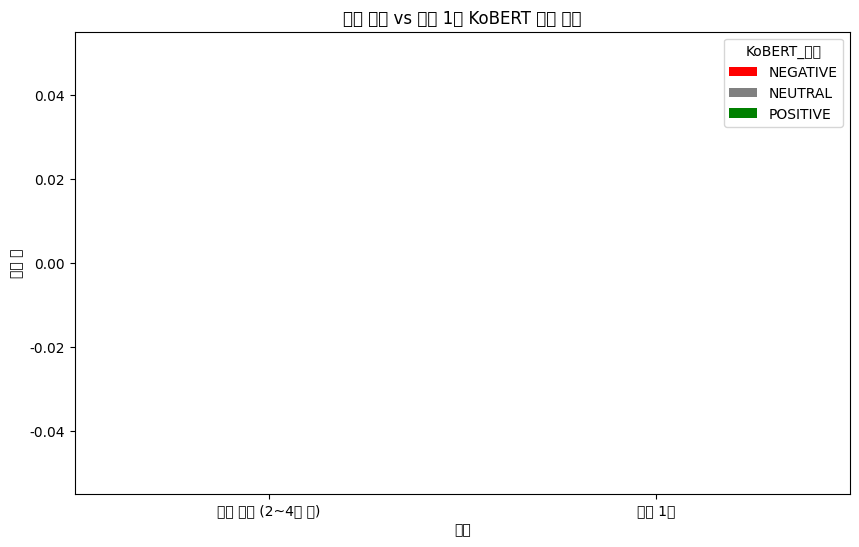

부정 댓글 비율 변화:
 기간
정책 직후 (2~4주 전)    0
최근 1주             0
dtype: int64


In [ ]:
import re

def convert_to_weeks(text):
    text = str(text).lower()
    num = int(re.search(r'\d+', text).group()) if re.search(r'\d+', text) else 0
    if "day" in text:
        return 0  # 1주 이내로 처리
    elif "week" in text:
        return num
    elif "month" in text:
        return num * 4  # 대략적인 변환
    return 0

df['작성_주'] = df['시간'].apply(convert_to_weeks)
df[['시간', '작성_주']].head()

def classify_period(weeks):
    if weeks <= 1:  # 1주 이내
        return '최근 1주'
    elif 2 <= weeks <= 4:
        return '정책 직후 (2~4주 전)'
    else:
        return '기타'

df['기간'] = df['작성_주'].apply(classify_period)
df['기간'].value_counts()


# KoBERT 감성 분포 비교
sentiment_compare = df.groupby(['기간', 'KoBERT_감성']).size().unstack().fillna(0)

# 항상 NEGATIVE / NEUTRAL / POSITIVE 컬럼이 있도록 보정
sentiment_compare = sentiment_compare.reindex(columns=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], fill_value=0)

# 시각화
sentiment_compare.plot(
    kind='bar', stacked=True, figsize=(10,6),
    color=['red', 'gray', 'green']
)
plt.title("정책 직후 vs 최근 1주 KoBERT 감성 분포")
plt.ylabel("댓글 수")
plt.xticks(rotation=0)
plt.show()

# 부정 댓글 비율
negative_ratio = sentiment_compare.apply(lambda row: row['NEGATIVE'] / row.sum() if row.sum() > 0 else 0, axis=1)
print("부정 댓글 비율 변화:\n", negative_ratio)